## What is Scikit-learn?

Scikit-learn is the most popular Python library for doing machine learning. It provides a simple and efficient API with tools for data modeling and data analysis. It is built on top of NumPy, SciPy, and Matplotlib. [Source: O'Reilly](https://www.oreilly.com/library/view/become-a-python/9781789531701/0eb36593-664d-4196-beeb-0385aef238f2.xhtml)

---

The purpose of this guide is to illustrate some of the main features that scikit-learn provides. It assumes a very basic working knowledge of machine learning practices (model fitting, predicting, cross-validation, etc.). Please refer to our installation instructions for installing scikit-learn.

The functionality that scikit-learn provides include:

- Regression, including Linear and Logistic Regression
- Classification, including K-Nearest Neighbors
- Clustering, including K-Means and K-Means++
- Model selection
- Preprocessing, including Min-Max Normalization

---

The three chosen **Scikit-learn** that will be demonstrated in this notebook will be described below:

- Linear Regression
- Classification
- Model selection

## Linear Regression:

An interesting way to use Linear regression is by *Face Completion*, with a multi-output estimators. [Source: scikit-learn.org](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_multioutput_face_completion.html#sphx-glr-auto-examples-miscellaneous-plot-multioutput-face-completion-py)

The goal is to predict the lower half of a face given its upper half

The first column of images shows true faces. The next columns illustrate how extremely randomized trees, k nearest neighbors, linear regression and ridge regression complete the lower half of those faces.


<div>
<img src="https://raw.githubusercontent.com/thenriq/machine_Learning_Assessment/main/images/multioutput_face_completion_001.png", width="600"/>
</div>

---

#### Importing Libraries:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

#### Load the faces datasets:

In [4]:
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Thiago\scikit_learn_data


#### Test on a subset of people

In [5]:
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

n_pixels = data.shape[1]

#### Upper half of the faces:

In [6]:
X_train = train[:, : (n_pixels + 1) // 2]

#### Lower half of the faces:

In [7]:
y_train = train[:, n_pixels // 2 :]
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

#### Fit estimators

In [8]:
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

#### Plot the completed faces:

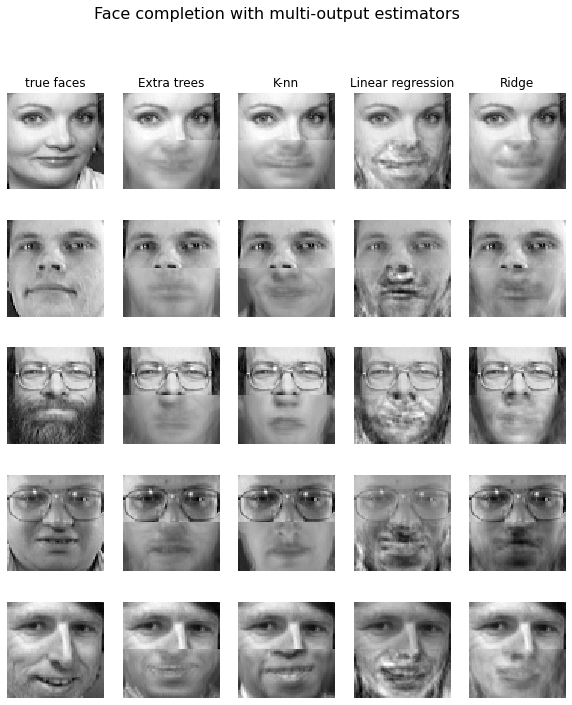

In [9]:
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()